In [2]:
import tensorflow as tf

tf.__version__

'2.9.1'

In [10]:
# load the data 
mnist = tf.keras.datasets.mnist # 28x 28 images of hand written digits from 0-9
# unpack the data 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalise x_train and x_test

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)


#bulid the model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

#compile the model
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

#fit the model
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 32s 14ms/step - loss: 0.2632 - accuracy: 0.9229
Epoch 2/3
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1074 - accuracy: 0.9668
Epoch 3/3
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0730 - accuracy: 0.9773


In [11]:
# validating loss and accuracy
val_loss, val_acc =model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 13ms/step - loss: 0.0851 - accuracy: 0.9735


In [12]:
# save the model
model.save('number_reader.model')

INFO:tensorflow:Assets written to: number_reader.model\assets


In [13]:
# load the model
new_model = tf.keras.models.load_model('number_reader.model')

In [21]:
#predict some things 
predictions = new_model.predict([x_test])
print(predictions)

313/313 [==============================] - 2s 7ms/step
[[1.1828921e-08 2.3805142e-06 1.2639441e-04 ... 9.9966967e-01
  4.9812922e-08 6.4866305e-07]
 [1.2039324e-09 1.7814977e-03 9.9821389e-01 ... 1.6027103e-08
  7.6143067e-07 1.9473012e-11]
 [3.3528771e-08 9.9962544e-01 2.5793883e-05 ... 4.1309569e-05
  2.8255797e-04 3.1122113e-07]
 ...
 [1.3835111e-08 4.3612440e-07 1.9295626e-07 ... 6.3592714e-05
  3.5672904e-06 9.7818360e-05]
 [3.7693269e-07 1.1146670e-05 2.0861523e-06 ... 4.7267946e-07
  5.3190342e-03 5.7366695e-08]
 [5.4330091e-08 1.3708137e-08 1.4615328e-08 ... 5.8476504e-09
  1.2441755e-08 1.8706119e-09]]


In [22]:
#checking a prediction 
import numpy as np
print(np.argmax(predictions[0]))

7


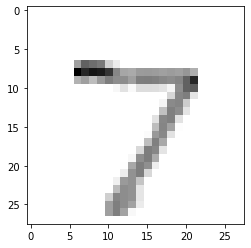

In [16]:
# some visualization of data
import matplotlib.pyplot as plt

plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()

#print(x_train[0])